## Import những thư viện cần thiết

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np


<h1><b>B. Khám phá dữ liệu (đan xen với tiền xử lý dữ liệu)</b></h1>

### Đọc dữ liệu từ tập tin (file)

Đầu tiên, Đọc dữ liệu từ file "inf.csv" và lưu kết quả vào DataFrame df_info.

In [30]:
df_info = pd.read_csv('inf.csv')
df_info = df_info.set_index('Id').sort_index()
df_info

,Title,Price,Square,District,City,Date
Id,,,,,,
478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.5 Triệu/tháng,18m²,Quận 3,Hồ Chí Minh,\n20/06/2020
728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.3 Triệu/tháng,25 m²,Quận 7,Hồ Chí Minh,\n17/10/2018
781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3 Triệu/tháng,15m²,Quận 10,Hồ Chí Minh,\n05/10/2018
781448,Chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7 Triệu/tháng,27m²,Tân Bình,Hồ Chí Minh,\n06/10/2018
789361,"Phòng cho thuê giá rẻ, Quận Gò Vấp gần chung c...",1.7 Triệu/tháng,12m²,Gò Vấp,Hồ Chí Minh,\n09/10/2018
...,...,...,...,...,...,...
2119311,"Cho thuê phòng ĐẸP 16m2 đường Thành Thái-Q10, ...",5 Triệu/tháng,16m²,Quận 10,Hồ Chí Minh,\n25/11/2022
2122158,Thuê phòng 2.5 triệu 20m2 căn bìa tầng trệt gầ...,2.5 Triệu/tháng,20m²,Quận 4,Hồ Chí Minh,\n29/11/2022
2127186,Cho thuê mặt bằng KD và phòng trọ số 36/66 Ngu...,2 Triệu/tháng,6m²,Bình Thạnh,Hồ Chí Minh,\n07/12/2022


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột

In [31]:
df_info.shape

(1185, 6)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?





Mỗi dòng trong DataFrame `df_info` cho biết thông tin của nhà trọ phòng trọ cho thuê. Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

Ta sẽ xem thử rằng trong tập có dòng nào bị trùng không. Nếu trùng thì trả về True, không thì là False và lưu số dòng trùng vào biến num_duplicated_rows

In [32]:
#Tính tổng dòng lặp
num_duplicated_rows = df_info.duplicated().sum()
is_duplicated = (num_duplicated_rows != 0)
print('So dong lap la {}'.format(num_duplicated_rows))
print(is_duplicated)

So dong lap la 0
False


### Mỗi cột có ý nghĩa gì?

Ý nghĩa của mỗi cột là:

- **ID** là để phân biệt phòng trọ, nhà trọ.

- **Title** là tiêu đề của phòng trọ, nhà trọ.

- **Price** là giá cho thuê của phòng trọ, nhà trọ theo tháng, đơn vị là VNĐ.

- **Square** là diện tích của phòng trọ, nhà trọ, đơn vị là $m^2$.

- **District** là địa chỉ quận của phòng trọ, nhà trọ.

- **City** là địa chỉ thành phố của phòng trọ, nhà trọ.

- **Date** là ngày đăng tin cho thuê của phòng trọ, nhà trọ.

In [33]:
df_info.columns

Index(['Title', 'Price', 'Square', 'District', 'City', 'Date'], dtype='object')

Ta kiểm tra dạng dữ liệu của các cột để xem có đúng với dạng mà ta mong muốn không.

In [34]:
df_info.dtypes

Title       object
Price       object
Square      object
District    object
City        object
Date        object
dtype: object

Ta thấy các cột đều ở dạng object, điều này là không nên bởi vì nếu cột nào cũng ở dạng object thì rất khó tính toán. Ta thấy rằng có 3 cột có thể chuyển sang dạng khác là Price (numeric), Square (numeric), Date (datetime). Ta sẽ tiến hành chuyển dạng của các cột này

Đầu tiên là cột Square, ta sẽ coi thử giá trị của nó

In [35]:
df_info["Square"]

Id
478324       18m²
728993      25 m²
781296       15m²
781448       27m²
789361       12m²
            ...  
2119311      16m²
2122158      20m²
2127186       6m²
2127880      22m²
2127970    52.5m²
Name: Square, Length: 1185, dtype: object

Ta thấy rằng các giá trị đều có m² ở sau, ta loại bỏ và chuyển nó sang dạng số

In [36]:
df_info["Square"] =df_info["Square"].str.replace('m²','')
df_info["Square"] = pd.to_numeric(df_info["Square"],errors='coerce')
df_info.rename(columns={'Square':'Square(m²)'},inplace=True)
df_info['Square(m²)']

Id
478324     18.0
728993     25.0
781296     15.0
781448     27.0
789361     12.0
           ... 
2119311    16.0
2122158    20.0
2127186     6.0
2127880    22.0
2127970    52.5
Name: Square(m²), Length: 1185, dtype: float64

Ta thấy rằng cột Price có thể chuyển sang dạng số, như vậy ta sẽ xử lý nó, đem nó về dạng số với đơn vị là TriệuVNĐ/tháng

Ta sẽ xem qua các giá trị của cột này

In [37]:
df_info["Price"]

Id
478324     3.5 Triệu/tháng 
728993      3.3 Triệu/tháng
781296       3 Triệu/tháng 
781448       7 Triệu/tháng 
789361     1.7 Triệu/tháng 
                 ...       
2119311      5 Triệu/tháng 
2122158    2.5 Triệu/tháng 
2127186      2 Triệu/tháng 
2127880    2.9 Triệu/tháng 
2127970    3.5 Triệu/tháng 
Name: Price, Length: 1185, dtype: object

Ta thấy rằng sau giá thường có đơn vị như Triệu/tháng,... ta sẽ coi cụ thể hơn các giá trị để tiện xử lý

In [38]:
df_info["Price"].unique()

array(['3.5 Triệu/tháng ', '3.3 Triệu/tháng', '3 Triệu/tháng ',
       '7 Triệu/tháng ', '1.7 Triệu/tháng ', '1.5 Triệu/tháng ',
       '5 Triệu/tháng', 'Thương lượng', '6 Triệu/tháng',
       '4.5 Trăm nghìn/tháng', '4 Triệu/tháng', '1.2 Triệu/tháng',
       '5.5 Triệu/tháng', '4.5 Triệu/tháng ', '2.6 Triệu/tháng ',
       '2.5 Triệu/tháng ', '3500 Triệu/tháng ', '4.7 Triệu/tháng',
       '2.3 Triệu/tháng', '1.1 Triệu/tháng', '1 Triệu/tháng',
       '3.7 Triệu/tháng', '3.5 Triệu/tháng', '2.6 Triệu/tháng',
       '7.5 Triệu/tháng', '5.8 Triệu/tháng', '3 Triệu/tháng',
       '5.9 Triệu/tháng', '2.8 Triệu/tháng', '1.3 Triệu/tháng',
       '1.8 Triệu/tháng ', '4 Triệu/tháng ', '2.1 Triệu/tháng',
       '2.5 Triệu/tháng', '1.5 Triệu/tháng', '1.9 Triệu/tháng',
       '2.2 Triệu/tháng', '3.2 Triệu/tháng', '1.25 Triệu/tháng',
       '6.8 Triệu/tháng', '2.7 Triệu/tháng ', '4.5 Triệu/tháng',
       '6.5 Triệu/tháng', '2 Triệu/tháng ', '9 Trăm nghìn/tháng',
       '2 Triệu/tháng', '2.25 Triệu/th

Ta thấy có các dạng đơn vị là Triệu/tháng, Trăm nghìn/tháng, Triệu/m2/tháng, Trăm nghìn/m2/tháng, Nghìn/m2/tháng  và có thêm một kiểu giá trị là Thương lượng. Ta sẽ chuyển toàn bộ đơn vị sang Triệu/tháng và loại bỏ đơn vị ở sau để tiện chuyển nó thành số, riêng giá trị Thương lượng thì ta sẽ để là NaN

In [39]:

def convert_price(price,square):
    if 'Triệu/tháng' in price:
        price = price.replace('Triệu/tháng','')
        return float(price)
    if 'Trăm nghìn/tháng' in price:
        price = price.replace('Trăm nghìn/tháng','')
        return float(price)/10
    if 'Triệu/m2/tháng' in price:
        if pd.isna(square):
            return np.nan
        price = price.replace('Triệu/m2/tháng','')
        return float(price)*square
    if 'Trăm nghìn/m2/tháng' in price:
        if pd.isna(square):
            return np.nan
        price = price.replace('Trăm nghìn/m2/tháng','')
        price = float(price)/10
        return price*square
    if 'Nghìn/m2/tháng' in price:
        if pd.isna(square):
            return np.nan
        price = price.replace('Nghìn/m2/tháng','')
        price = float(price)/1000
        return price*square
    return np.nan


df_price_square = df_info[['Price','Square(m²)']]

Ta thực hiện chuyển đổi

In [40]:
for i in df_price_square.index:
    df_price_square.at[i,'Price'] = convert_price(df_price_square.loc[i]['Price'],df_price_square.loc[i]['Square(m²)'])

Lưu vào dataframe

In [41]:
df_info['Price'] =  pd.to_numeric(df_price_square['Price'])
df_info.rename(columns={'Price':'Price(Triệu/tháng)'},inplace=True)

Coi lại giá trị của cột này

In [42]:
df_info["Price(Triệu/tháng)"].unique()

array([3.5000e+00, 3.3000e+00, 3.0000e+00, 7.0000e+00, 1.7000e+00,
       1.5000e+00, 5.0000e+00,        nan, 6.0000e+00, 4.5000e-01,
       4.0000e+00, 1.2000e+00, 5.5000e+00, 4.5000e+00, 2.6000e+00,
       2.5000e+00, 3.5000e+03, 4.7000e+00, 2.3000e+00, 1.1000e+00,
       1.0000e+00, 3.7000e+00, 7.5000e+00, 5.8000e+00, 5.9000e+00,
       2.8000e+00, 1.3000e+00, 1.8000e+00, 2.1000e+00, 1.9000e+00,
       2.2000e+00, 3.2000e+00, 1.2500e+00, 6.8000e+00, 2.7000e+00,
       6.5000e+00, 2.0000e+00, 9.0000e-01, 2.2500e+00, 3.4000e+00,
       1.6000e+00, 1.0000e+01, 4.9000e+00, 5.3000e+00, 6.2000e+00,
       4.2000e+00, 6.1000e+00, 4.8000e+00, 1.4000e+00, 9.0000e+00,
       6.6000e+00, 8.5000e+00, 1.1000e+01, 5.1000e+00, 6.0000e-01,
       3.6000e+00, 8.0000e-01, 2.9000e+00, 8.0000e+00, 1.2000e+06,
       2.9500e+00, 7.0000e-01, 2.8000e+01, 3.0000e+06, 2.4000e+00,
       8.5000e-01, 3.1000e+00, 3.8000e+00, 1.6000e+06, 1.5000e+06,
       4.3000e+00, 1.1500e+00, 9.5000e+00, 1.2000e+01, 2.4000e

Ở cột Date, ta thấy tui là nó biểu diễn ngày tháng năm nhưng lại không có dạng dữ liệu là datetime mà là object, ta cũng sẽ xử lý trường hợp này

In [43]:
#Coi dữ liệu của cột Date
df_info["Date"]

Id
478324     \n20/06/2020 
728993     \n17/10/2018 
781296     \n05/10/2018 
781448     \n06/10/2018 
789361     \n09/10/2018 
               ...      
2119311    \n25/11/2022 
2122158    \n29/11/2022 
2127186    \n07/12/2022 
2127880    \n08/12/2022 
2127970    \n08/12/2022 
Name: Date, Length: 1185, dtype: object

Dữ liệu của cột này có dư kí tự '\n' và '\r, vậy ta cần phải loại bỏ trước khi chuyển dạng của nó

In [44]:
df_info["Date"] = df_info["Date"].str.replace('\r','')
df_info["Date"] = df_info["Date"].str.replace('\n','')
df_info["Date"] = df_info["Date"].str.replace(' ','')
pd.to_datetime(df_info["Date"],format = "%d/%m/%Y",errors = 'coerce')

Id
478324    2020-06-20
728993    2018-10-17
781296    2018-10-05
781448    2018-10-06
789361    2018-10-09
             ...    
2119311   2022-11-25
2122158   2022-11-29
2127186   2022-12-07
2127880   2022-12-08
2127970   2022-12-08
Name: Date, Length: 1185, dtype: datetime64[ns]

## XỬ LÝ DỮ LIỆU NAN

Ta xem thử mỗi cột có bao nhiêu dữ liệu nan

In [45]:
df_info.isnull().sum()

Title                  0
Price(Triệu/tháng)     8
Square(m²)            38
District               0
City                   0
Date                   0
dtype: int64

Vì đây là những thuộc tính khá khó để suy hay đoán nên đơn giản thì ta sẽ drop nó đi

In [46]:
df_info.dropna(inplace=True)

## Ouliers

Ta vẽ biểu đồ boxplot để tìm outliers của giá và diện tích

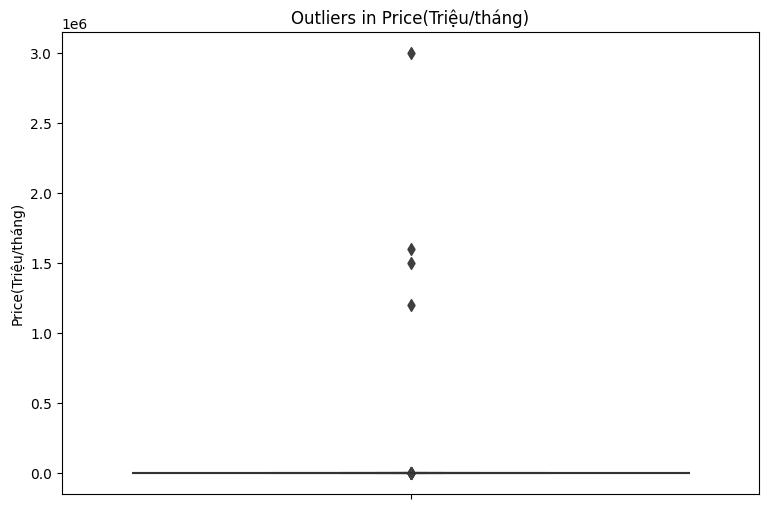

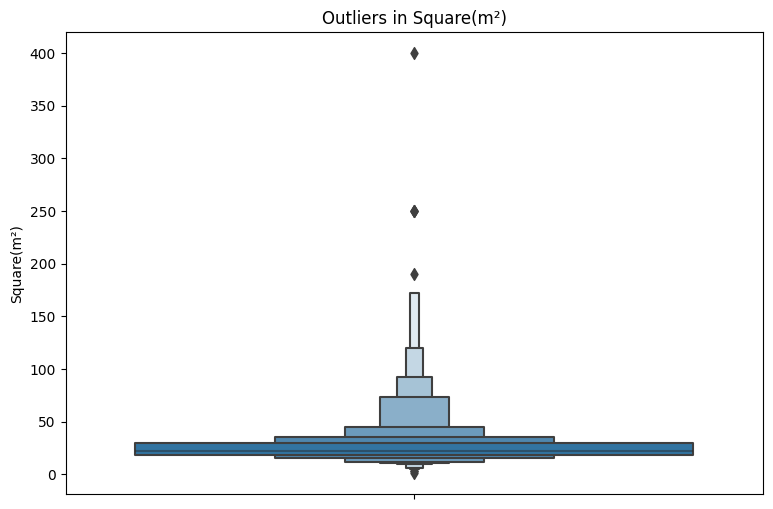

In [47]:
for col in ['Price(Triệu/tháng)','Square(m²)']:
    plt.figure(figsize=(9,6))
    sns.boxenplot(y=col,data=df_info)
    plt.title('Outliers in {}'.format(col))
    plt.show()

Ta nhận thấy giá có outliers có giá trị trên 500, ta sẽ in những dòng này xem thử

In [48]:
outliers_price = df_info[df_info['Price(Triệu/tháng)'] > 500]
outliers_price

,Title,Price(Triệu/tháng),Square(m²),District,City,Date
Id,,,,,,
841207,Cho thuê phòng quận 4 đường vân đồn giáp quận ...,3500.0,45.0,Quận 4,Hồ Chí Minh,15/10/2018
1441460,"Phòng quận 5 cho thuê, giờ tự do, được nấu ăn ...",1200000.0,22.0,Quận 5,Hồ Chí Minh,10/03/2019
1450703,"Cho thuê phòng trọ 27m2 đường Nguyễn Khoái, Ph...",3000000.0,27.0,Quận 4,Hồ Chí Minh,09/05/2019
1478477,"Phòng trọ cho thuê,giá 1tr6/tháng.phòng riêng,...",1600000.0,16.0,Gò Vấp,Hồ Chí Minh,06/09/2019
1479914,Phòng trọ cho thuê đường nguyễn ảnh thủ quận 1...,1500000.0,18.0,Quận 12,Hồ Chí Minh,11/09/2019


Dựa vào thông tin của web và title, ta biết chủ nhà đã nhập nhầm giá tiền khiến giá trị tăng cao, ta sẽ tiến hành điều chỉnh các giá trị này lại.

Giá đúng của một giá trị trong này là một số nhỏ hơn 10, vậy ta sẽ chia cho đến khi giá trị đó nhỏ hơn 10

In [49]:
for i in range(len(outliers_price['Price(Triệu/tháng)'])):
    while(outliers_price['Price(Triệu/tháng)'].iloc[i] >= 10):
        outliers_price['Price(Triệu/tháng)'].iloc[i] /= 10

C:\Users\HP\AppData\Local\Temp\ipykernel_8132\3507608141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_price['Price(Triệu/tháng)'].iloc[i] /= 10


In [50]:
outliers_price

,Title,Price(Triệu/tháng),Square(m²),District,City,Date
Id,,,,,,
841207,Cho thuê phòng quận 4 đường vân đồn giáp quận ...,3.5,45.0,Quận 4,Hồ Chí Minh,15/10/2018
1441460,"Phòng quận 5 cho thuê, giờ tự do, được nấu ăn ...",1.2,22.0,Quận 5,Hồ Chí Minh,10/03/2019
1450703,"Cho thuê phòng trọ 27m2 đường Nguyễn Khoái, Ph...",3.0,27.0,Quận 4,Hồ Chí Minh,09/05/2019
1478477,"Phòng trọ cho thuê,giá 1tr6/tháng.phòng riêng,...",1.6,16.0,Gò Vấp,Hồ Chí Minh,06/09/2019
1479914,Phòng trọ cho thuê đường nguyễn ảnh thủ quận 1...,1.5,18.0,Quận 12,Hồ Chí Minh,11/09/2019


Cập nhập vào df chính

In [51]:
df_info.loc[outliers_price.index,'Price(Triệu/tháng)'] = outliers_price['Price(Triệu/tháng)']

Ta thấy một vài outliers của diện tích lớn hơn 150, ta sẽ in những dòng này để kiểm tra thử

In [52]:
outliers_square = df_info[df_info['Square(m²)'] > 150]
outliers_square

,Title,Price(Triệu/tháng),Square(m²),District,City,Date
Id,,,,,,
1491943,Ký túc xá máy lạnh giá chỉ 450k/tháng đủ nội t...,0.45,190.0,Quận 8,Hồ Chí Minh,07/06/2020
1589500,Cho thuê KTX Homestay cao cấp quận Thủ Đức,1.60,250.0,Thủ Đức,Hồ Chí Minh,13/01/2021
1722246,Cho thuê phòng riêng Q. Thủ Đức - gần Gigamall...,3.00,250.0,Thủ Đức,Hồ Chí Minh,13/01/2021
1722247,Cho thuê KTX Homestay Q.Thủ Đức giá rẻ 1 triệu...,1.00,250.0,Thủ Đức,Hồ Chí Minh,13/01/2021
1775448,Cho thuê giường KTX trung tâm Phú Nhuận Gía 1.6tr,1.60,400.0,Phú Nhuận,Hồ Chí Minh,19/05/2021


Ta thấy đa phần là ký túc xá, 1 cái lại cho thuê phòng riêng (nhưng lấy diện tích của căn nhà). Nhìn cũng khá cùng kiểu và không có gì bất thường. Tuy nhiên ta sẽ bỏ đi dòng cho thuê phòng riêng vì nếu chỉ dựa vào title mà không kiểm tra thông tin trên web thì phòng này có diện tích khá vô lý

In [53]:
df_info.drop(index = 1722246,inplace= True)

In [54]:
df_info.to_csv('clean_data.csv')